# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [5]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [6]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

In [7]:
w = data[data.race=='w']
b = data[data.race=='b']

In [8]:
w_call=sum(w.call)/len(data)
b_call=sum(b.call)/len(data)
w_call_per=w_call/(w_call+b_call)
b_call_per=b_call/(w_call+b_call)
print('percentage of Whites who got call= ', w_call_per)
print('percentage of Blacks who got call= ', b_call_per)  

percentage of Whites who got call=  0.5994897959183674
percentage of Blacks who got call=  0.4005102040816327


In [9]:
# Compute percentage difference of white and black from data: diff_obs
diff_obs = w_call_per-b_call_per

# Concatenate call: call_concat
call_concat = np.concatenate((w.call,b.call))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(100000)

for i in range(100000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(call_concat, size=len(call_concat))
    
    # Compute replicate
    bs_replicates[i] = (np.sum(bs_sample[:len(w)])-np.sum(bs_sample[len(w):]))/(np.sum(bs_sample[:len(w)])+np.sum(bs_sample[len(w):]))

# Compute and print p-value: p
p = np.sum(bs_replicates>=diff_obs) / len(bs_replicates)

print('p-value =', p)


p-value = 2e-05


### Null hypothesis: There is no difference between callbacks for two groups.
### Alternative hypothesis: There is a difference between callback for two groups.

Bootstrap tesing with p value of 2e-5 indicates the means of percentage of callbacks for whites and blacks are different with null hypothesis is rejected. 

In [10]:
stats.ttest_ind(w.call,b.call)

Ttest_indResult(statistic=4.114705290861751, pvalue=3.940802103128886e-05)

t test with p value of 3.9e-5 rejects the null hypothesis. 

In [11]:
## White group
ci = 1.96
p = w_call_per
margin_of_error = np.sqrt((p*(1-p)/len(w)))*ci
ci_lo = p - margin_of_error
ci_hi = p + margin_of_error
print("White group")
print("Mean: ", p)
print("Margin of error: ", margin_of_error)
print("Confidence interval: ", ci_lo, ',', ci_hi)



White group
Mean:  0.5994897959183674
Margin of error:  0.019462753350108143
Confidence interval:  0.5800270425682592 , 0.6189525492684755


In [12]:
## Black group
ci = 1.96
p = b_call_per
margin_of_error = np.sqrt((p*(1-p)/len(b)))*ci
ci_lo = p - margin_of_error
ci_hi = p + margin_of_error
print("Black group")
print("Mean: ", p)
print("Margin of error: ", margin_of_error)
print("Confidence interval: ", ci_lo, ',', ci_hi)


Black group
Mean:  0.4005102040816327
Margin of error:  0.019462753350108143
Confidence interval:  0.3810474507315245 , 0.41997295743174085


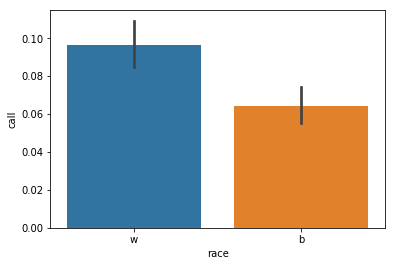

In [13]:
race_vs_call = data[['race','call']]
sns.barplot(x='race', y='call', data=race_vs_call)
plt.show()

White group receive 60% +/- 1.9% and Black group receive 40% +/- 1.9% calls with 95% confidence level.

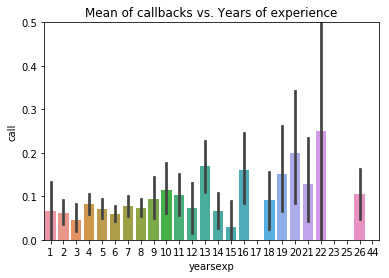

In [14]:
x = data[["yearsexp","call"]]
sns.barplot(x="yearsexp",y="call",data=x)
plt.ylim(0,0.5)
plt.title("Mean of callbacks vs. Years of experience")
plt.show()

In [15]:
w13plus=sum(w[w['yearsexp']>13]['call'])/sum(w.call)
print(w13plus)

0.1702127659574468


In [16]:
b13plus=sum(b[b['yearsexp']>13]['call'])/sum(b.call)
print(b13plus)

0.16560509554140126


Above figure indicates more than 13 years experience gets more calls than those having less experience. At the same time for white group 17% getting calls have 13 plus experience while black group 16.5% calls have 13 years experience. 
This is telling us the experience seems a big factor in determing call numbers.